In [10]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection
import numpy as np
import utils

# Sequential Feature Selector

In [11]:
df = utils.load_data()
df.head()

,borough,acc,pi,all_pedest,fi,fli,fri,fti,cli,cri,...,of_exclusi,any_exclus,commercial,curb_exten,all_red_an,new_half_r,distdt,ln_distdt,traffic_10000,ped_100
0,Anjou,0,5.086985,False,11146.733398,0.000000,7573.853516,3572.879150,0.000000,38528.082031,...,0,False,0,False,False,False,12443.302734,9.428938,1.114673,0.050870
1,Lasalle,0,4.623140,False,11132.230469,280.682495,246.728973,10604.819336,177.901520,570.331360,...,0,False,0,False,False,False,7529.126953,8.926535,1.113223,0.046231
2,Sud-Ouest,0,1.659536,False,35766.421875,671.687134,5111.062012,29983.673828,30.455984,0.000000,...,1,True,0,False,False,True,2598.419922,7.862659,3.576642,0.016595
3,Mercier-Hochelaga-Maisonneuve,0,5.644925,False,14683.734375,1.996429,0.000000,14681.738281,3.756564,0.000000,...,0,False,0,False,False,False,8754.989258,9.077379,1.468373,0.056449
4,Sud-Ouest,0,7.526567,False,9135.659180,249.553619,217.610748,8668.494141,1048.081299,762.582520,...,0,False,2,False,False,False,5202.576172,8.556910,0.913566,0.075266


In [12]:
df = utils.prepare_data(df)
X_train, y_train, X_test, y_test = utils.split_data(df, label_col="acc")

In [13]:
nb_of_boroughs = len([c for c in df.columns if c.startswith("borough")])
feature_groups = [[i] for i in range(len(X_train.columns))][:-nb_of_boroughs]
feature_groups.append(
    list(range(len(X_train.columns) - nb_of_boroughs, len(X_train.columns)))
)
# feature_groups

In [ ]:
model = linear_model.LinearRegression()

sfs = SFS(
    model,
    k_features=(1, 20),
    scoring="r2",
    forward=True,
    floating=True,
    cv=5,
    feature_groups=feature_groups,
)
selected_features = sfs.fit(X_train, y_train)

In [19]:
print(len(selected_features.k_feature_names_))
selected_features.k_feature_names_

18


('cti',
 'ln_pi',
 'ln_fli',
 'tot_road_w',
 'median',
 'green_stra',
 'any_ped_pr',
 'lt_protect',
 'parking',
 'east_ped',
 'south_veh',
 'total_lane',
 'of_exclusi',
 'any_exclus',
 'commercial',
 'all_red_an',
 'distdt',
 'ln_distdt')

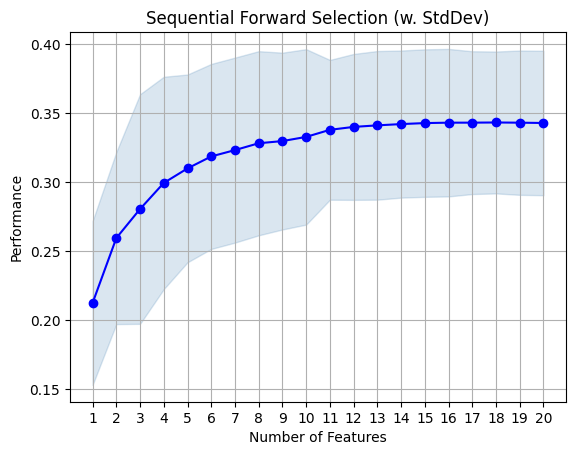

In [16]:
fig1 = plot_sequential_feature_selection(sfs.get_metric_dict(), kind="std_dev")

# plt.ylim([0.8, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.grid()
plt.show()

In [29]:
# Measure performance on test set
X_test = X_test[list(selected_features.k_feature_names_)]
X_train = X_train[list(selected_features.k_feature_names_)]

# model = linear_model.PoissonRegressor()
model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [30]:
utils.evaluate_predictions(model, X_test, y_test)

MAE: 1.693248650200449
MSE: 5.687598114288985
RMSE: 5.687598114288985
R2: 0.3901289226347884
